### Iris flower dataset classification.
####    Dataset is taken from sklearn.datasets. There are 150 samples containing 3 classifications of iris flower based on some features. Need to frame a mode and figure out the accuracy and use to predict in which category a given sample falls into.

In [28]:
#importing libraries and loading dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# checking the files in directory
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [78]:
# creating dataframe with features and target(output)
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [80]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [81]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [82]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

##### Data is preprocessed. Moving to train/test and modelling

In [83]:
X = df.drop(columns=['target'])
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [84]:
len(X_train), len(X_test)

(105, 45)

#### 1. Using Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [86]:
model.fit(X_train, Y_train)

LogisticRegression()

In [87]:
model.score(X_test, Y_test) * 100

93.33333333333333

In [90]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

##### There is 93.3% accuracy for the model and it has predicted the sample correctly.

#### 2. Using Support Vector Machine

In [91]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [92]:
# adding species names column
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


##### Data Visualization

In [93]:
from matplotlib import pyplot as plt

%matplotlib inline

In [94]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

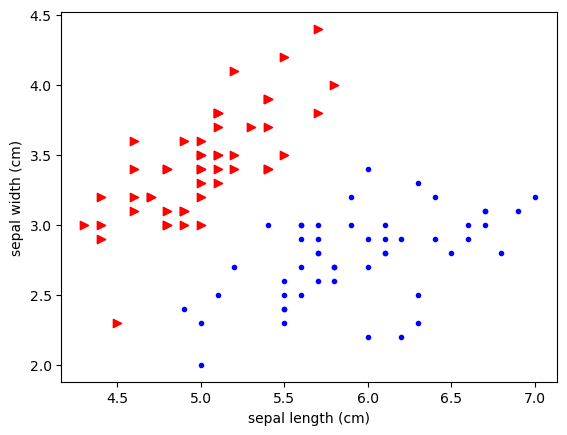

In [95]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='>')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

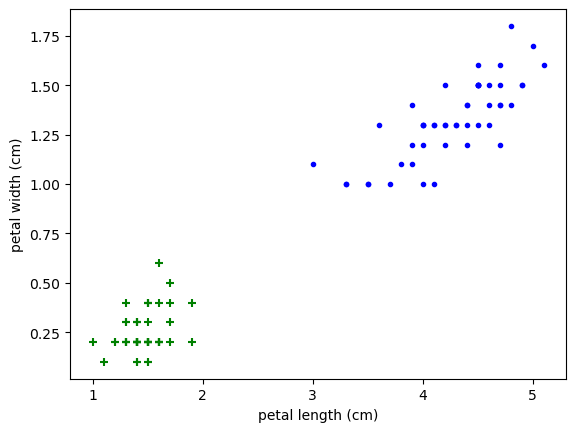

In [96]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

In [97]:
# Moving to train/test
x = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [99]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train,y_train)

SVC()

In [41]:
model.score(x_test,y_test)

0.9666666666666667

In [43]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

##### There is 96.7% accuracy for the model and it has predicted the sample correctly.

#### 3. Using Decision Tree

In [62]:
inputs = df.drop(['target','flower_name'], axis='columns')
target = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
model.score(x_test,y_test)

0.9333333333333333

In [70]:
model.predict([[4.8,3.0,1.5,0.3]])
model.predict([[6.5,3.0,5.2,2.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

##### The accuracy for this model is 93%  & and the prediction is correct

#### 4.Random Forest Classification

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
model.score(x_test,y_test)

0.9666666666666667

In [73]:
model.predict([[6.5,3.0,5.2,2.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

##### The accuracy for this model is 96.7 & and the prediction is correct

#### 5.Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [101]:
model.score(x_test,y_test)

0.8333333333333334

In [102]:
model.predict([[6.5,3.0,5.2,2.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([2])

##### The accuracy for this model is 83.3% & and the prediction is correct

#### 6.KNN Classification

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [104]:
model.score(x_test,y_test)

0.8333333333333334

In [105]:
model.predict([[4.8,3.0,1.5,0.3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

##### The accuracy is 83% and prediction is correct